In [ ]:
# Guanxiao Chen
# 1005717841
# INF2178
# Assignment 2

In [2]:
import pandas as pd

# 2. Data Cleaning
# Load the dataset
df = pd.read_excel('./INF2178_A2_data.xlsx')

# Display DataFrame's information
print('Data Overview:')
print(df.info())

# Drop unuseful columns
columns_to_drop = ['_id', 'LOC_ID', 'ADDRESS', 'PCODE', 'ward']
df_cleaned = df.drop(columns=columns_to_drop)

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("\nMissing values before filling:")
print(missing_values)

# Fill missing values using forward fill
df_cleaned.fillna(method='ffill', inplace=True)

# Check for missing values after filling
missing_values_after = df_cleaned.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after)

# Dispaly the cleaned DataFrame
print('\nCleaned Data Overview:')
print(df_cleaned.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB
None

Missing values before filling:
LOC_NAME  

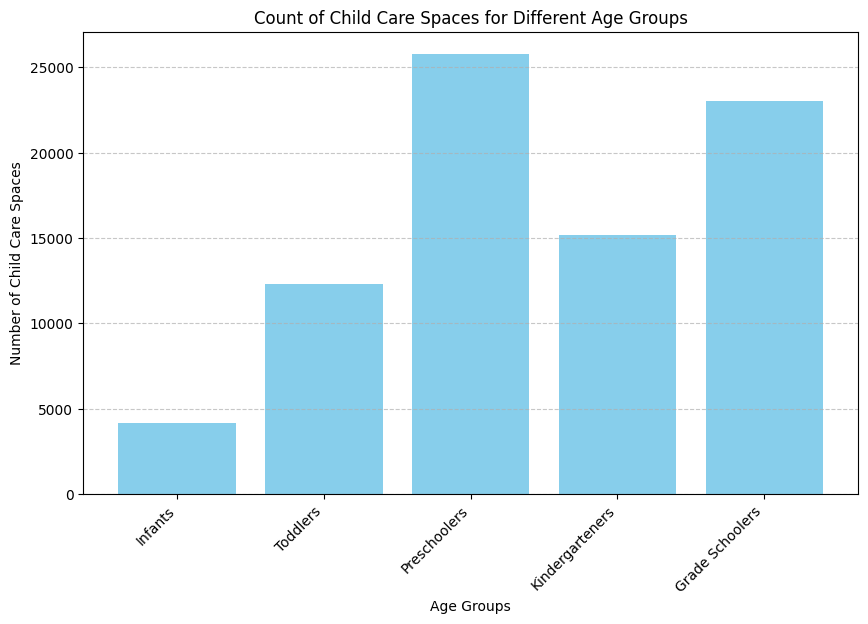

In [3]:
# 3. Exploratory Data Analysis

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('./INF2178_A2_data.xlsx')

# Select relevant columns for analysis
age_columns = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']
age_labels = ['Infants', 'Toddlers', 'Preschoolers', 'Kindergarteners', 'Grade Schoolers']

# Calculate the total number of child care spaces for each age group
age_counts = df_cleaned[age_columns].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_labels, age_counts, color='skyblue')
plt.title('Count of Child Care Spaces for Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Child Care Spaces')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-4-5d4512733c21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['Overall_Capacity'] = df_cleaned[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']].sum(axis=1)


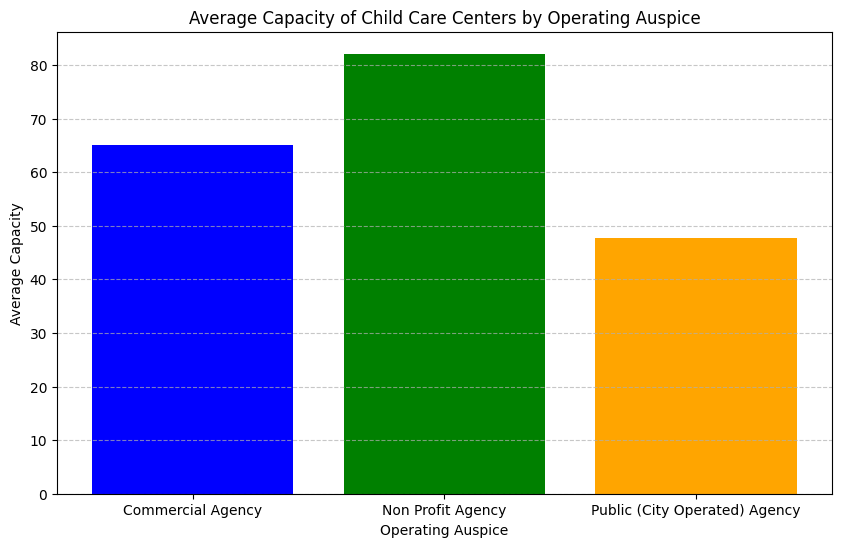

In [4]:
# 3. Exploratory Data Analysis

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('./INF2178_A2_data.xlsx')

# Select relevant columns for analysis
df_analysis = df_cleaned[['AUSPICE', 'TOTSPACE']]

# Calculate overall center capacity
df_analysis['Overall_Capacity'] = df_cleaned[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']].sum(axis=1)

# Calculate average capacity for each auspice
avg_capacity = df_analysis.groupby('AUSPICE')['Overall_Capacity'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(avg_capacity['AUSPICE'], avg_capacity['Overall_Capacity'], color=['blue', 'green', 'orange'])
plt.title('Average Capacity of Child Care Centers by Operating Auspice')
plt.xlabel('Operating Auspice')
plt.ylabel('Average Capacity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


One-Way ANOVA Results:
                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN
Levene test p-value: nan
Shapiro-Wilk test p-value: 1.4964898448030214e-25

Two-Way ANOVA Results:
                             sum_sq      df          F        PR(>F)
C(AUSPICE)             8.567996e+03     2.0   2.057586  1.282730e-01
C(subsidy)             8.352744e+04     1.0  40.117876  3.529094e-10
C(AUSPICE):C(subsidy)  5.603445e+04     2.0  13.456555  1.694282e-06
Residual               2.202809e+06  1058.0        NaN           NaN


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


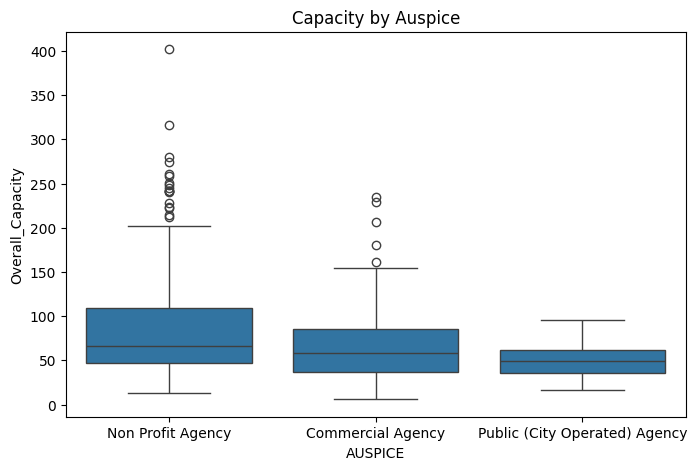

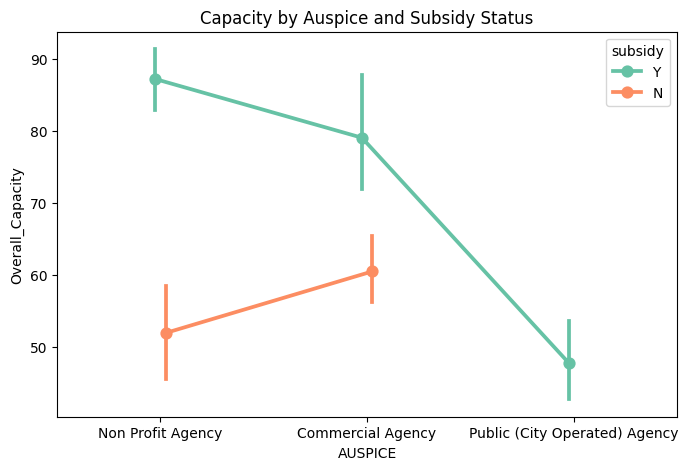

In [5]:
# 4. Impact of Operating Auspice on Child Care Center Capacity
# Research Question 1: How does the operating auspice (Commercial, Non Profit, or Public) of child care centers impact their capacity?

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('./INF2178_A2_data.xlsx')

df['Overall_Capacity'] = df_cleaned[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']].sum(axis=1)

# One-Way ANOVA on Operating Auspice
model_one_way = ols('Overall_Capacity ~ C(AUSPICE)', data=df).fit()
results_one_way = sm.stats.anova_lm(model_one_way, typ=2)
print("One-Way ANOVA Results:")
print(results_one_way)

# Homogeneity of variances
stat, p = levene(df['Overall_Capacity'][df['AUSPICE'] == 'Commercial'],
                 df['Overall_Capacity'][df['AUSPICE'] == 'Non Profit'],
                 df['Overall_Capacity'][df['AUSPICE'] == 'Public'])
print(f"Levene test p-value: {p}")

# Normality of residuals
_, p = shapiro(model_one_way.resid)
print(f"Shapiro-Wilk test p-value: {p}")

# Two-Way ANOVA on Operating Auspice and Subsidy Status
model_two_way = ols('Overall_Capacity ~ C(AUSPICE) * C(subsidy)', data=df).fit()
results_two_way = sm.stats.anova_lm(model_two_way, typ=2)
print("\nTwo-Way ANOVA Results:")
print(results_two_way)

# One-Way ANOVA Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='AUSPICE', y='Overall_Capacity', data=df)
plt.title('Capacity by Auspice')
plt.show()

# Two-Way ANOVA Visualization for Interaction
plt.figure(figsize=(8, 5))
sns.pointplot(x='AUSPICE', y='Overall_Capacity', hue='subsidy', data=df, dodge=True, palette="Set2")
plt.title('Capacity by Auspice and Subsidy Status')
plt.show()



One-Way ANOVA Results:
                    sum_sq      df        F        PR(>F)
C(bldg_type)  5.205689e+05    29.0  9.72056  1.715361e-37
Residual      1.907608e+06  1033.0      NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 58, but rank is 34
  warnings.warn('covariance of constraints does not have full '



Two-Way ANOVA Results:
                               sum_sq      df             F        PR(>F)
C(bldg_type)             9.998990e+05    29.0  1.899015e+01  1.558573e-29
C(AUSPICE)              -1.684039e-06     2.0 -4.637589e-10  1.000000e+00
C(bldg_type):C(AUSPICE)  2.622099e+05    58.0  2.489954e+00  6.381552e-06
Residual                 1.835612e+06  1011.0           NaN           NaN
Levene test p-value: 1.5839200470207374e-19
Shapiro-Wilk test p-value: 1.0150350260303108e-20


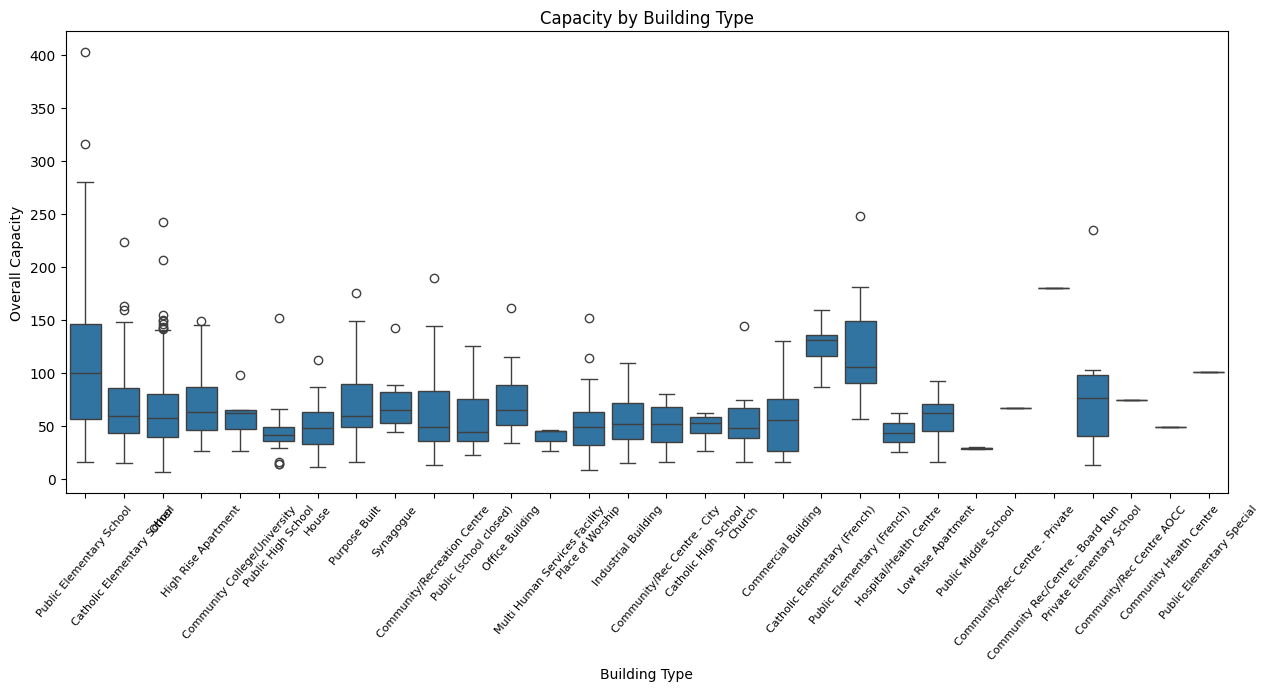

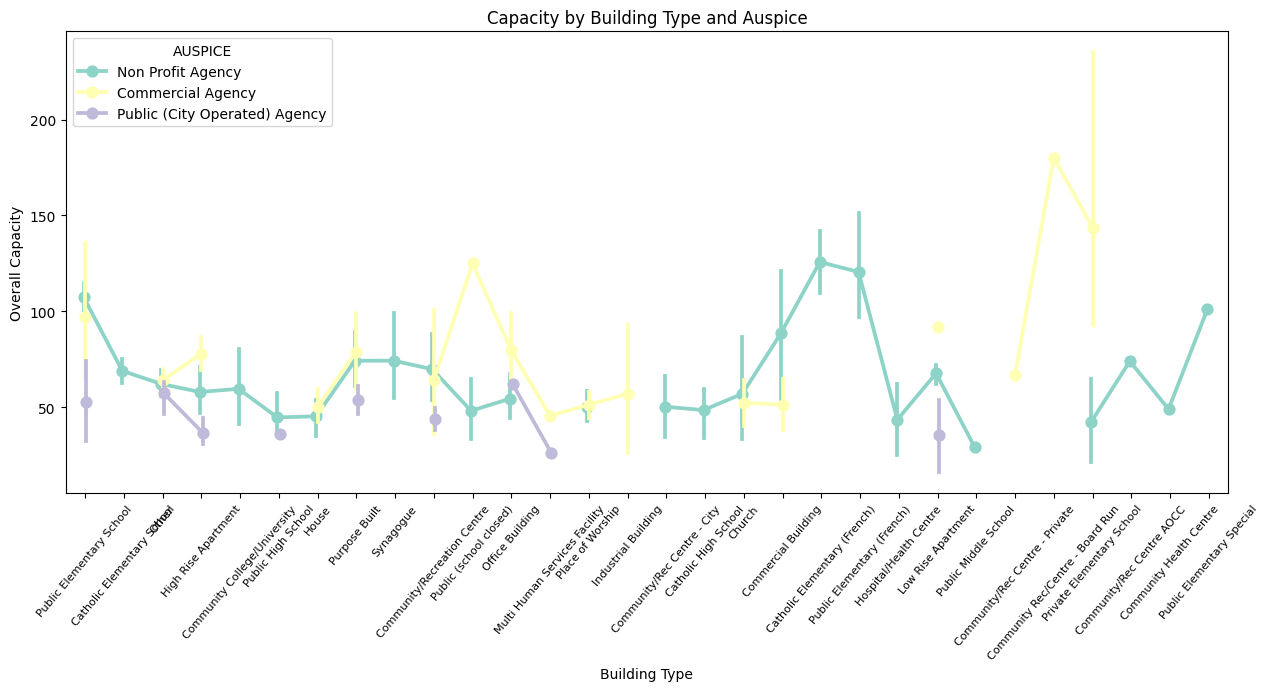

In [7]:
# 5. Analysis of Building Type and Child Care Center Capacity
# Research Question 2: Is there a significant difference in the capacity of child care centers based on the type of building they are located in?

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('./INF2178_A2_data.xlsx')

df['Overall_Capacity'] = df_cleaned[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']].sum(axis=1)

# One-Way ANOVA on Building Type
model_one_way = ols('Overall_Capacity ~ C(bldg_type)', data=df).fit()
results_one_way = sm.stats.anova_lm(model_one_way, typ=2)
print("One-Way ANOVA Results:")
print(results_one_way)

# Two-Way ANOVA on Building Type and Auspice
model_two_way = ols('Overall_Capacity ~ C(bldg_type) * C(AUSPICE)', data=df).fit()
results_two_way = sm.stats.anova_lm(model_two_way, typ=2)
print("\nTwo-Way ANOVA Results:")
print(results_two_way)

# Homogeneity of Variances (Levene's Test)
stat, p = levene(*[df['Overall_Capacity'][df['bldg_type'] == t] for t in df['bldg_type'].unique()])
print(f"Levene test p-value: {p}")

# Normality of Residuals (Shapiro-Wilk Test)
_, p = shapiro(model_one_way.resid)
print(f"Shapiro-Wilk test p-value: {p}")

# Boxplot for One-Way ANOVA
plt.figure(figsize=(15, 6))
sns.boxplot(x='bldg_type', y='Overall_Capacity', data=df)
plt.title('Capacity by Building Type')
plt.xlabel('Building Type', fontsize=10)
plt.ylabel('Overall Capacity', fontsize=10)
plt.xticks(rotation=50, fontsize=8)
plt.yticks(fontsize=10)
plt.show()

# Pointplot for Two-Way ANOVA Interaction
plt.figure(figsize=(15, 6))
sns.pointplot(x='bldg_type', y='Overall_Capacity', hue='AUSPICE', data=df, dodge=True, palette="Set3")
plt.title('Capacity by Building Type and Auspice')
plt.xlabel('Building Type', fontsize=10)
plt.ylabel('Overall Capacity', fontsize=10)
plt.xticks(rotation=50, fontsize=8)
plt.yticks(fontsize=10)
plt.show()


One-Way ANOVA Results:
                   sum_sq      df           F         PR(>F)
C(AgeGroup)  2.821233e+05     4.0  188.190768  4.517383e-151
Residual     1.990101e+06  5310.0         NaN            NaN

Two-Way ANOVA Results:
                   sum_sq      df          F        PR(>F)
C(AUSPICE)   32108.667729     2.0  50.888535  7.889039e-22
Residual    334409.189279  1060.0        NaN           NaN


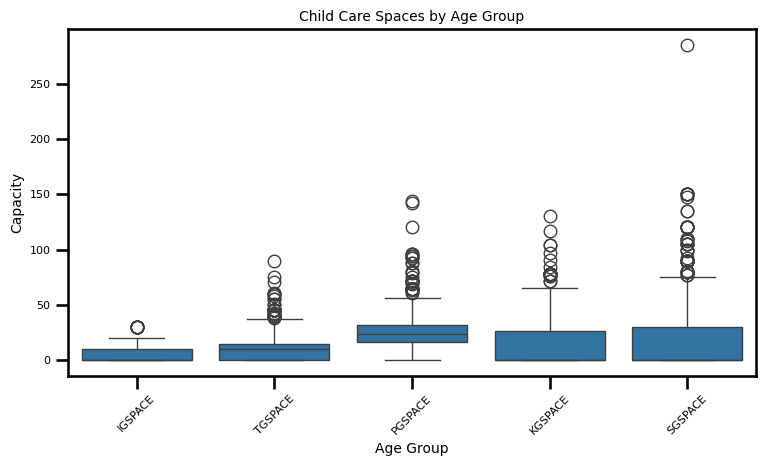

<ipython-input-8-19311aacb879>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AUSPICE', y='PGSPACE', data=df, palette='Set3')  # Replace 'IGSPACE' as needed


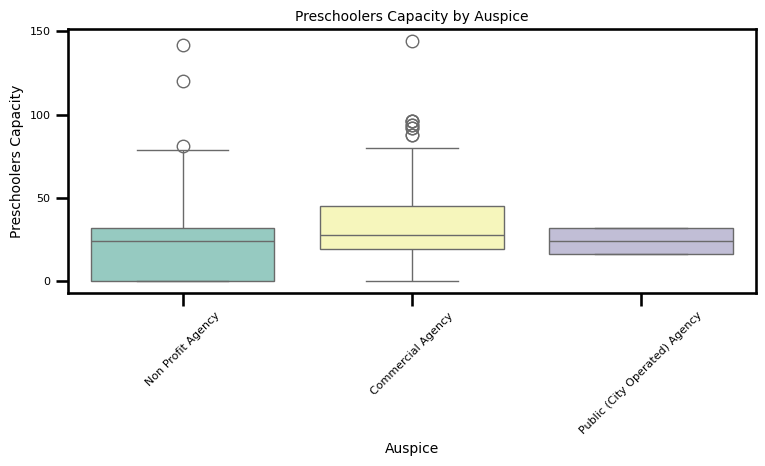

In [8]:
# 6. The Influence of Age Groups and Operating Auspice
# Research Question 3: How does the distribution of child care spaces vary across different age groups, and is there a significant difference in capacity based on the age group served by the child care center?
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import levene, shapiro

# Load the dataset
df = pd.read_excel('./INF2178_A2_data.xlsx')

# Melt the dataframe to long format for ANOVA
df_long = pd.melt(df, id_vars=['AUSPICE'], value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'],
                  var_name='AgeGroup', value_name='Capacity')

# One-Way ANOVA for Age Groups
model_one_way = ols('Capacity ~ C(AgeGroup)', data=df_long).fit()
results_one_way = sm.stats.anova_lm(model_one_way, typ=2)
print("One-Way ANOVA Results:")
print(results_one_way)

# Two-Way ANOVA for Total Capacity and Auspice
model_two_way = ols('PGSPACE ~ C(AUSPICE)', data=df).fit()  # Analyze Preschoolers
results_two_way = sm.stats.anova_lm(model_two_way, typ=2)
print("\nTwo-Way ANOVA Results:")
print(results_two_way)

# Increase overall graph size and font size for readability
plt.figure(figsize=(8, 5))
sns.set_context("talk")

# Boxplot for One-Way ANOVA Results
sns.boxplot(x='AgeGroup', y='Capacity', data=df_long)
plt.title('Child Care Spaces by Age Group', fontsize=10)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Capacity', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Boxplot for Two-Way ANOVA Results
# Increase overall graph size and font size for readability
plt.figure(figsize=(8, 5))
sns.set_context("talk")

sns.boxplot(x='AUSPICE', y='PGSPACE', data=df, palette='Set3')
plt.title('Preschoolers Capacity by Auspice', fontsize=10)
plt.xlabel('Auspice', fontsize=10)
plt.ylabel('Preschoolers Capacity', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()